# Homework 5 - CS348 Spring 2019

**Description** - In this assignment, you will run and analyze binary classification using decision trees.

**Getting Started** - You should complete the assignment using your own installation of Python 3 and the packages numpy, pandas, matplotlib, and seaborn. Download the assignment from Moodle and unzip the file. This will create a directory with this file, 'HW05.ipynb'.

You will also need to install the pydotplus library by running `pip install pydotplus` or `conda install pydotplus` in the terminal.

**Deliverables** - The assignment has a single deliverable: this jupyter notebook file saved as a pdf. Please answer all coding and writing questions in the body of this file. Once all of the answers are complete, download the file by navigating the following menus: File -> Download as -> PDF via LaTeX. Submit the downloaded pdf file on gradescope. Alternatively, you can save the file as a pdf via the following: File -> Print Preview -> Print as pdf.

**Data Sets** - In this assignment, you will a single dataset from the sci-kit learn repository on breast cancer.

**Academic Honesty Statement** - Copying solutions from external sources (books, web pages, etc.) or other students is considered cheating. Sharing your solutions with other students is considered cheating. Posting your code to public repositories such as GitHub is also considered cheating. Any detected cheating will result in a grade of 0 on the assignment for all students involved, and potentially a grade of F in the course. 

This academic honesty statement does not restrict you from reading official documentation or using other web resources for understanding the syntax of python, related data science libraries, or properties of distributions.

In [1]:
# Do not import any other libraries other than those listed here. 
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from sklearn.datasets import load_breast_cancer
from IPython.display import Image


# Problem 1 - Decision Tree Classifiers

In this problem you'll use a Decision Tree model to classify whether a tumor is benign or malignant in a breast cancer dataset.

In [2]:
# Loading data.
data = load_breast_cancer()

In [3]:
x = data['data']
y = data['target']

x_train = x[:500]
y_train = y[:500]
x_val = x[500:]
y_val = y[500:]

In [4]:
def get_num_leaves(model):
    return sum(model.tree_.children_left < 0)

def print_decision_tree(model):
    # Taken from https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
    dot_data = StringIO()

    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# Modifed from David Dale's solution at https://stackoverflow.com/questions/49428469/pruning-decision-trees.
def prune_tree(model, threshold):
    prune_index(model.tree_, 0, threshold)
    return model

def prune_index(inner_tree, index, threshold):
    # Recursively call prune_index until you hit the leaf nodes.
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)
    if inner_tree.value[index].sum() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF

## Part 1 (10 points)  
Using sci-kit learn's `DecisionTreeClassifier` class with `random_state=0`, fit a model between features `x_train` and targets `y_train`. Use the function `print_decision_tree(model)` to visually inspect the trained decision tree model. 

Using only the printed decision tree, evaluate the following sample probabilities.   

`P(y_train=1)`  
`P(y_train=1|X22>106.1)`  
`P(y_train=0|X22>106.1, X7>0.049)`  

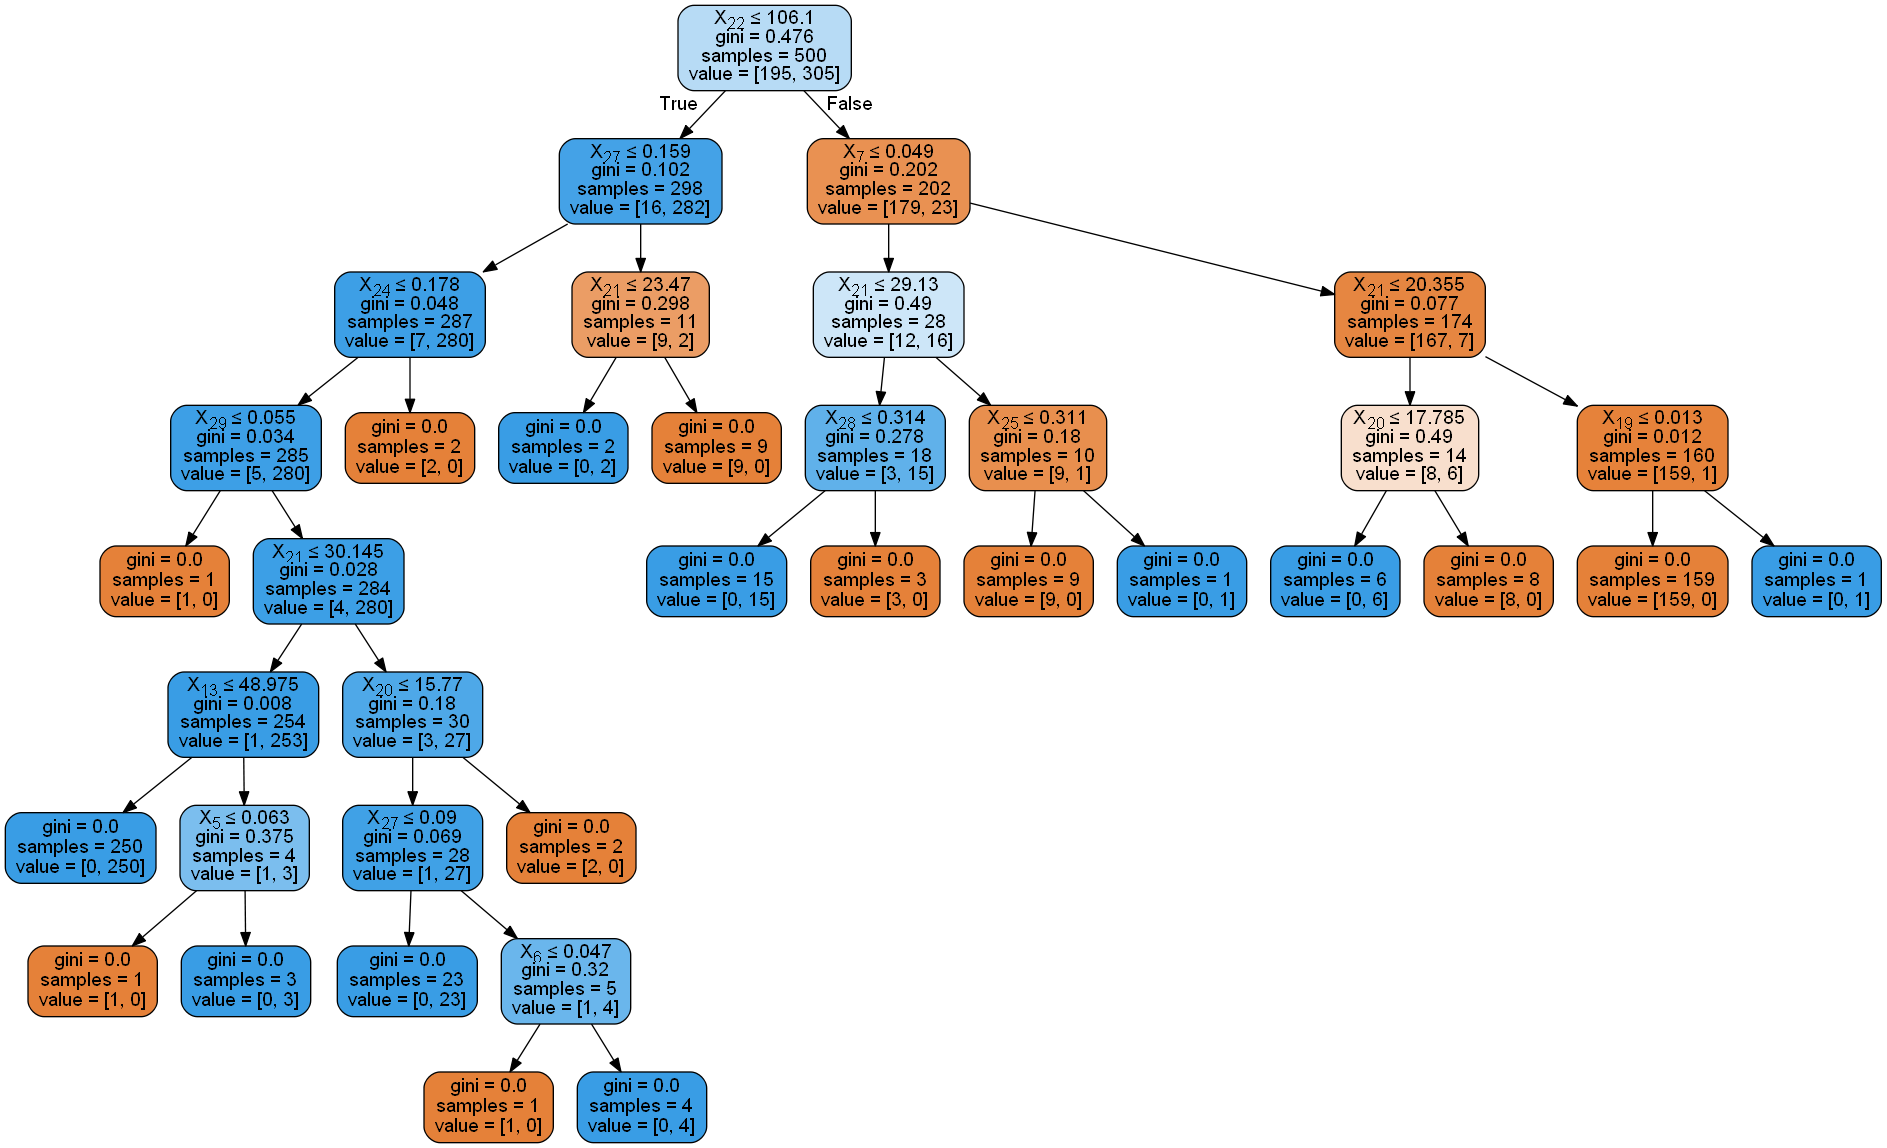

In [5]:
# Part 1 Solution

# --- write code here ---
decisionTree=DecisionTreeClassifier(random_state=0)
model=decisionTree.fit(x_train,y_train)
print_decision_tree(model)

### Part 1 Written Response

_Type your written response here_

P(y_train=1)=305/500=0.61

The root node shows value[195,305] which tells us the class frequency that 195 data instances from the training set are class=0 and 305 instances are class=1.

P(y_train=1|X22>106.1)=23/202=0.113861386

The root node has the inequality x22<=106.1 so we are looking for data when this is false which means we go to the right child in the tree. This node has value[179,23] which indicates that 23/(179+23) instances are class=1.

P(y_train=0|X22>106.1, X7>0.049)=167/174=0.96

node where x22>106.1,x7>0.049 has value[167,7] so 167/(167+7) instances have class=0

## Part 2 (20 points)  
Again using sci-kit learn's `DecisionTreeClassifier` class with `random_state=0`, fit a model between features `x_train` and targets `y_train`. Use the function `prune_tree` with a threshold of `200` to prune the trained decision tree model. Use the function `print_decision_tree(model)` to visually inspect the pruned decision tree model.

Using only the two printed decision trees, describe an instance of `x` such that the model you trained in part 1 would predict `y=0` and the pruned model would predict class `y=1`. Be specific about variable values.

Note: The function `prune_tree(model, threshold)` takes as input a fully trained decision tree model and returns a modified decision tree model where every decision node with `samples < threshold` is converted into a leaf node.

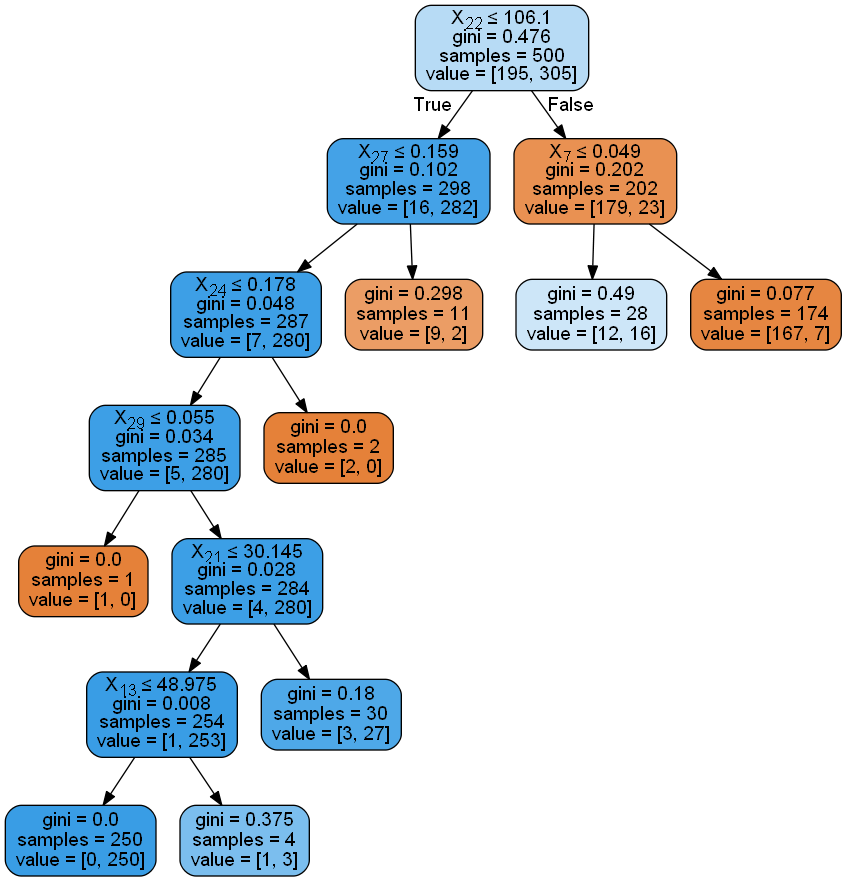

In [6]:
# Part 2 Solution

# --- write code here ---
decisionTree2=DecisionTreeClassifier(random_state=0)
model=decisionTree2.fit(x_train,y_train)
model=prune_tree(model,200)
print_decision_tree(model)

### Part 2 Written Response

_Type your written response here_

The model in part 1 predicts y=0 when
x22<=106.1, x27<=0.159, x24<=0.178, x29>0.055, x21<=30.145, x20>15.77

so we can suppose that x22=100, x27=0.01, x24=0.05, x29=2, x21=17, x20=16

Whereas the pruned model predicts y=1 when 
x22<=106.1, x27<=0.159, x24<=0.178, x29>0.055, x21<=30.145


## Part 3 (30 points)  
Again using sci-kit learn's `DecisionTreeClassifier` class with `random_state=0` and `max_depth=1`, fit a model between features `x_train` and targets `y_train`. Use the function `print_decision_tree(model)` to visually inspect the pruned decision tree model.

Using only the printed decision trees, describe an instance of `x` such that the models you trained in part 1  and part 2 would both predict `y=0`, but the model with `max_depth=1` would predict `y=1`.

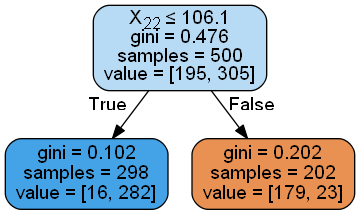

In [7]:
# Part 3 Solution

# --- write code here ---
decisionTree3=DecisionTreeClassifier(random_state=0,max_depth=1)
model=decisionTree3.fit(x_train,y_train)
print_decision_tree(model)

### Part 3 Written Response

_Type your written response here_

This model from part 3 predicts y=1 when

x22<=106.1

The models from parts 1 and 2 predict y=0 when 

x22<=106.1 and x27>0.159

So the models would produce different results if for example
x22=105 and x27=1

## Part 4 (20 points)  
For every combination of `max_depth` between 1 and 10 and `threshold` between 0 and 350 in increments of 25, train a decision tree classifer on `x_train` and `y_train` and then prune the trained using the `prune_tree` function. Create a scatterplot with `threshold` on the horizontal axis and `max_depth` on the vertical axis, using color to show the classification accuracy of each point. Make 2 scatterplots using this same format, one with training accuracies and the other with validation accuracies.

Based on these scatterplots, which values should we select for `max_depth` and `threshold`? If there are multiple models with comparable accuracies, describe other criteria we may want to consider when selecting a decision tree model.

Hint: You may find it easier to use `plt.scatter` or `ax.scatter` than `sns.scatterplot` for this problem.

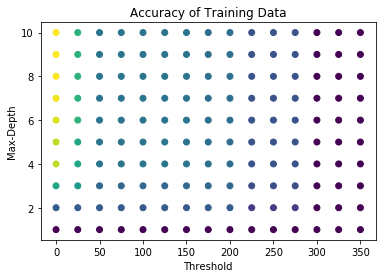

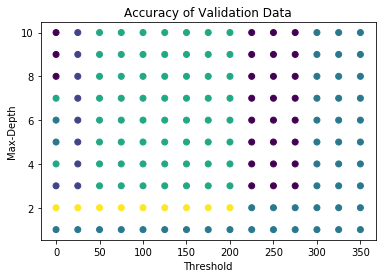

In [9]:
# Part 4 Solution

# --- write code here ---
train_acc=[]
val_acc=[]
threshold=[]
depth=[]
#depth
for d in range(1,11):
    #threshold
    for t in range(0,351,25):
        threshold.append(t)
        depth.append(d)
        decisionTree=DecisionTreeClassifier(random_state=0,max_depth=d)
        model=decisionTree.fit(x_train,y_train)
        model=prune_tree(model,t)
        train_acc.append(model.score(x_train,y_train))
        val_acc.append(model.score(x_val,y_val))


plt.figure(1)
plt.scatter(threshold,depth,c=train_acc)
plt.xlabel("Threshold")
plt.ylabel("Max-Depth")
plt.title("Accuracy of Training Data") #Yellow indicates highest accuraccy
plt.figure(2)
plt.scatter(threshold,depth,c=val_acc)
plt.xlabel("Threshold")
plt.ylabel("Max-Depth")
plt.title("Accuracy of Validation Data") #Yellow indicates highest accuraccy
plt.show()


### Part 4 Written Response

_Type your written response here_

We care about a model that does well on test data, rather than training data. If we look at the scatter plot which shows the accuracy of the model on validation data, then it is clear that the highest model accuracy is achieved when max-depth=2 and the threshold can span from 0 to 200 with equal accuracy for each. 

Since there are multiple models with comparable accuracies then we have to consider some other critera. We could think about restricting the minimum samples for a leaf node to be allowed in the tree, this could help to avoid overfitting. Another aspect we should consider is minimizing the gini value for nodes because it represents how well the data is split into the two classes at that point. 

## Part 5 (20 Points)
In this problem you'll explore an alternative hyperparameter search strategy, random search. For each of 100 iterations train a decision tree classifier on `x_train` and `y_train` using a `max_depth` sampled from a discrete uniform distribution between 1 and 9. Then prune the trained model using a `threshold` sampled from a uniform distribution between 0 and 350. Construct 2 plots identical to the plots you produced in part 4 using these new randomly sampled hyperparameters and models.

Do the results of this random search change your selection from part 4? If not, describe a setting in which random search would be preferable to grid search.

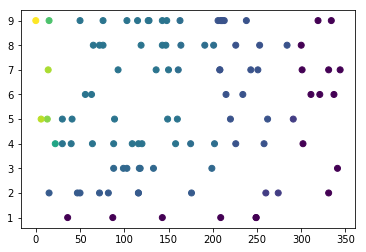

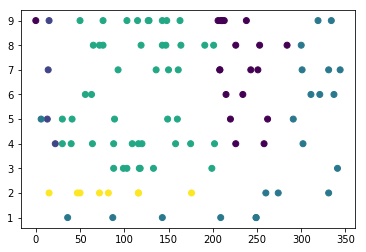

In [9]:
# Part 5 Solution

# --- write code here ---

train_scores=[]
val_scores=[]
depth2=[]
threshold2=[]
#100 iterations
for d in range(0,100):
    #get uniformly random values for depth,threshold
    depth=np.random.randint(1,10)
    threshold=np.random.randint(0,351)
    depth2.append(depth)
    threshold2.append(threshold)
    decisionTree=DecisionTreeClassifier(random_state=0,max_depth=depth)
    model=decisionTree.fit(x_train,y_train)
    model=prune_tree(model,threshold)
    train_scores.append(model.score(x_train,y_train))
    val_scores.append(model.score(x_val,y_val))
    


plt.figure(3)
plt.scatter(threshold2,depth2,c=train_scores)

plt.figure(4)
plt.scatter(threshold2,depth2,c=val_scores)
plt.show()    
    
    
    

### Part 5 Written Response

_Type your written response here_

The random searches here do not change the conclusion we draw from the grid search in part 4. We observe that the ideal max-depth is still 2 and the threshold ranges from 0 to 200. 

Random search would be preferable to grid search in some cases when the range of our hyperparameters like max_depth and threshold is much larger. Random search would give us an idea of which values are better without having to train a model for every single combination of parameter.  